# Hands Gesture Classifier


### Table of Contents:
1. [Import of libraries](#0)
2. [Data mining](#1)
3. [Preprocessing](#2)
4. [Classifiers](#3)
5. [Testing](#4)
6. [Compare the results](#5)


## <a name='0'></a>1. Import of libraries

In [3]:
!pip install opencv-python==4.5.3.56 
!pip install mediapipe==0.8.8 

In [4]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

import csv
import os

import hand_detector as hd
from models import ActionType, HandType

import mediapipe as mp # Import mediapipe
import cv2 # Import opencv

sklearn.__version__

'0.24.1'

### Constants variables

In [24]:
COORDS_FILE_NAME = 'hand_gesture_coords.csv'

## <a name='1'></a>2. Data mining

### Implement Simple Camera Capture

In [82]:
hand_landmarks_list = []
hand = None

In [83]:
cam_width, cam_height = 1280, 720

cap = cv2.VideoCapture(0)
cap.set(3, cam_width)
cap.set(4, cam_height)

detector = hd.HandDetector(max_num_hands=2)
    
while cap.isOpened():
    success, img = cap.read()
    
    all_hands, img = detector.find_hands(img)
    if all_hands:
        hand = all_hands[0]
        hand_landmarks_list = all_hands[0].landmarks

    cv2.imshow("Hands Gesture Classifier", img)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [84]:
number_coords = len(hand_landmarks_list)
print(hand_landmarks_list)
number_coords

[[441, 419, 0.0], [505, 399, -0.016030842438340187], [556, 355, -0.022268028929829597], [589, 314, -0.02916538715362549], [618, 284, -0.036181047558784485], [510, 263, -0.002410688204690814], [531, 202, -0.014059805311262608], [541, 163, -0.023328524082899094], [550, 129, -0.02993302047252655], [472, 249, -0.007682662457227707], [487, 177, -0.017369084060192108], [496, 133, -0.028029926121234894], [504, 94, -0.03670836612582207], [435, 250, -0.016913091763854027], [439, 180, -0.03118155710399151], [445, 136, -0.0445057637989521], [452, 99, -0.05338646098971367], [397, 265, -0.02852746658027172], [383, 208, -0.04240858927369118], [378, 171, -0.05234764888882637], [378, 137, -0.059074778109788895]]


21

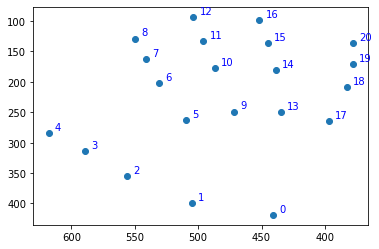

In [90]:
x = []
y = []

for landmark in hand_landmarks_list: 
    x.append(landmark[0])
    y.append(landmark[1])
    
for index, coord in enumerate(zip(x, y)):
    plt.text(coord[0] - 5, coord[1] - 5, index, color='blue')
    

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

plt.scatter(x, y)

### Prepare dataset file (.csv)

In [62]:
columns = ['target']
for val in range(1, number_coords + 1):
    columns += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val)]
    
columns

['target',
 'x1',
 'y1',
 'z1',
 'x2',
 'y2',
 'z2',
 'x3',
 'y3',
 'z3',
 'x4',
 'y4',
 'z4',
 'x5',
 'y5',
 'z5',
 'x6',
 'y6',
 'z6',
 'x7',
 'y7',
 'z7',
 'x8',
 'y8',
 'z8',
 'x9',
 'y9',
 'z9',
 'x10',
 'y10',
 'z10',
 'x11',
 'y11',
 'z11',
 'x12',
 'y12',
 'z12',
 'x13',
 'y13',
 'z13',
 'x14',
 'y14',
 'z14',
 'x15',
 'y15',
 'z15',
 'x16',
 'y16',
 'z16',
 'x17',
 'y17',
 'z17',
 'x18',
 'y18',
 'z18',
 'x19',
 'y19',
 'z19',
 'x20',
 'y20',
 'z20',
 'x21',
 'y21',
 'z21']

Create dataset file and save prepared columns names in it 

In [67]:
with open(COORDS_FILE_NAME, mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(columns)

In [68]:
for a in ActionType:
    print(a)

ActionType.CLICK
ActionType.RESET
ActionType.GRAB
ActionType.GO_BACK
ActionType.GO_FORWARD


### Create hand gesture dataset 

In [22]:
def create_gesture_dataset(action_type: ActionType, hand_type: HandType, sample_num = 100):
    """
    The function reads the location with all landmarks via a webcam. Pre-processes the data. 
    It also saves the finished data in a file.
    :param action_type: Action type for which the samples will be created.
    :param hand_type: Type of hand for which the samples will be created.
    :param sample_num: Number of samples created for action type.
    """
    cam_width, cam_height = 1280, 720
    cap = cv2.VideoCapture(0)
    cap.set(3, cam_width)
    cap.set(4, cam_height)

    detector = hd.HandDetector(max_num_hands=2)

    while cap.isOpened():
        success, img = cap.read()
        all_hands, img = detector.find_hands(img)
       
        for hand in all_hands:
            if hand.type == hand_type:
                row = list(np.array(hand.landmarks).flatten())
                row.insert(0, action_type.value) 
                
#                 Save to file
                with open(COORDS_FILE_NAME, mode='a', newline='') as f:
                    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                    csv_writer.writerow(row)
                
                sample_num = sample_num - 1
        
        
            
        cv2.imshow("Hands Gesture Classifier", img)
        
        if sample_num <= 0:
            break
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [23]:
create_gesture_dataset(ActionType(0), HandType.RIGHT)

99
98
97
96
95
94
93
92
91
90
89
88
87
86
85
84
83
82
81
80
79
78
77
76
75
74
73
72
71
70
69
68
67
66
65
64
63
62
61
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0


## <a name='2'></a>3. Preprocessing


In [19]:
# Prepocessing code

## <a name='3'></a>4. Classifiers


In [24]:
"""
    This function fetches stock market quotations.
"""

list = np.array([2,3,4])

## <a name='4'></a>5. Testing

In [16]:
# testing code

## <a name='5'></a>6. Compare the results